In [2]:
from codes.python import load_database,ECG_denoising
from codes.python import QRS_detector
import numpy as np
from scipy import signal
from scipy.signal import savgol_filter
import operator
from numpy import array
import sys
import csv
import os
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing, plot
from codes.python import heartbeat_segmentation as shs
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.preprocessing import normalize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import pywt
from biosppy.signals import ecg
from sklearn import metrics
#import waipy
import operator
from codes.python import ecg_waveform_extractor as waveform
import time as system_time
from scipy import stats
import warnings
import termcolor as colored
from math import*

In [ ]:
def average(numbers):
    return float(sum(numbers)) / len(numbers)

In [35]:
mitdb = load_database.load_mitdb()
mitdb.segment_beats()

C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/100
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/100.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/100.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/100pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/101
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/101.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/101.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/101pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/102
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/102.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/102.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/102pt

C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/201.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/201pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/202
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/202.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/202.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/202pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/203
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/203.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/203.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/203pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/205
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/205

Filtered MLII records from : 102
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 102 completes.
Start segmenting records: 103
Filtered MLII records from : 103
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 103 completes.
Start segmenting records: 104
Filtered MLII records from : 104
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 104 completes.
Start segmenting records: 105
Filtered MLII records from : 105
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 105 completes.
Start segmenting records: 106
Filtered MLII records from : 106
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 106 completes.
Start segmenting records: 107
Filtered MLII records from : 107
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 107 completes.
Start segmenting records: 108
Filtered MLII records from : 108
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 108 completes.
Start segmentin

In [ ]:
mit100 = load_database.load_patient_record("mitdb","100")
mit100.set_segmented_beats_r_pos(winL=100,winR=200)
filtere_MLII = mit100.filtered_MLII
beats, poses = shs.segment(filtere_MLII,100,50,50,25)
assert len(beats) == 100
assert max(filtere_MLII[beats]) == filtere_MLII[poses],"max(pos) isn't equal to r_pos "
count = 0
assert shs.check_class_AAMI('N',-1) == 0

for patient in mitdb.patient_records:
    patient.set_Q_S_points_MLII()



    #r_peak_properties

    



In [ ]:
count = 0
for patient in mitdb.patient_records:
    
    
    print(patient.filename, count)
    count += 1
    assert len(patient.original_R_pos) == len(patient.segmented_R_pos) == len(patient.segmented_beat_time) == len(patient.segmented_beat_index),"Unequal length, should be equal in length"
    assert len(patient.segmented_beat_1) == len(patient.segmented_class_ID) == len(patient.segmented_beat_class),"Unequal lens, should be equal in length"
    
    
    assert len(patient.Q_points) == len(patient.S_points),"Unequal lens, should be equal in length"
    assert len(patient.segmented_R_pos) == len(patient.S_points),"Unequal lens, should be equal in length"
    r_properties = waveform.r_peak_properties_extractor(patient,to_area=False)
    assert len(r_properties["height"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"
    assert average(r_properties["height"]) < 3,"Average height of r_peak for patient "+ patient.filename+ " is greater than 3"
    assert average(r_properties["height"]) > 0.5,"Average height of r_peak for patient " +patient.filename+ " is less than 0.5"
    assert min(r_properties["height"]) >= 0,"Min height of r_peak for patient " +patient.filename+ " is less than 0"
    assert max(r_properties["height"]) < 5,"Max height of r_peak for patient " +patient.filename+ " is greater than 5"
    x ,y  = np.unique(r_properties["height"], return_counts=True) # counting occurrence of each loan
    index = np.where(x==0)
    index = np.asarray(index)
    if(index.size != 0):
        
        if(y[index[0]] > 20):
            warnings.warn("height equal to 0 number is greater then 20 in " + patient.filename + " record with 0 height number of "+ str(y[index[0]]))
        
    
    assert len(r_properties["durations"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"
    assert average(r_properties["durations"]) < 0.09,"Average duration of r_peak for patient "+ patient.filename+ " is greater than 0.09"
    assert average(r_properties["durations"]) > 0.01,"Average durations of r_peak for patient " +patient.filename+ " is less than 0.01"
    assert min(r_properties["durations"]) >= 0,"Min durations of r_peak for patient " +patient.filename+ " is less than 0"
    assert max(r_properties["durations"]) < 0.3,"Max durations of r_peak for patient " +patient.filename+ " is greater than 0.3"
    x ,y  = np.unique(r_properties["durations"], return_counts=True) # counting occurrence of each loan
    index = np.where(x==0)
    index = np.asarray(index)
    if(index.size != 0):
        
        if(y[index[0]] > 20):
            warnings.warn("durations equal to 0 number is greater then 20 in " + patient.filename + " record with 0 durations number of "+ str(y[index[0]]))
        
    
    assert len(r_properties["onset"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"   
    assert len(r_properties["offset"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length" 
    
    #print(r_properties["offset"])

    for i in range(0,len(patient.segmented_R_pos)-1):
        assert len(patient.segmented_beat_1[i])==len(patient.segmented_beat_1[i+1]), "Unequal lens, should be equal in length"
        assert len(patient.segmented_beat_time[i]) == len(patient.segmented_beat_time[i+1]), "Unequal lens, should be equal in length"
        assert len(patient.segmented_beat_1[i])==len(patient.segmented_beat_time[i]), "Unequal lens, should be equal in length"
        assert patient.segmented_R_pos[i] <= patient.segmented_R_pos[i+1], "the later r_pos is smaller " + patient.filename + " R_peak: " + str(patient.segmented_R_pos[i]) +" "+  str(patient.segmented_R_pos[i+1])
        assert len(r_properties["amplitudes"][i]) == 10, "The list of amplitudes is not equal to 10 in patient " + patient.filename + " "+ str(len(r_properties["amplitudes"][i]))
        assert r_properties["peaks"][i] <=  patient.segmented_R_pos[i]+6,"the peak position is not in range : Patient " + patient.filename+ " R_peak: " + str(r_properties["peaks"][i])
        assert r_properties["peaks"][i] >=  patient.segmented_R_pos[i]-6,"the peak position is not in range : Patient " + patient.filename+ " R_peak: " + str(r_properties["peaks"][i])
        assert r_properties["peaks"][i] <=  r_properties["peaks"][i+1], "the later peak position is smaller: Patient " + patient.filename+ " R_peak: " + str(r_properties["peaks"][i]) 
        if(r_properties["offset"][i] < r_properties["peaks"][i]):
            warnings.warn("r_peak is larger than offset. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        if(r_properties["onset"][i] > r_properties["peaks"][i]):
            warnings.warn("onset is larger than r_peak. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        if(r_properties["onset"][i] > r_properties["onset"][i+1]):
            warnings.warn("the later onset is larger than current onset. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        if(r_properties["offset"][i] > r_properties["offset"][i+1]):
            warnings.warn("the later offset is larger than current offset. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        #  assert max()
        #assert r_properties["onset"][i]  <= r_properties["peaks"][i],"the peak is smaller than onset in " + patient.filename + " onset: " + str(r_properties["onset"][i]) +" peak: "+  str(r_properties["peaks"][i]) 
        #assert r_properties["offset"][i] >= r_properties["peaks"][i],"the peak is larger than offset in " + patient.filename + " offset: " + str(r_properties["offset"][i]) +" peak: "+  str(r_properties["peaks"][i])



In [6]:
mit100 = load_database.load_patient_record("mitdb","100")
mit100.set_segmented_beats_r_pos(winL=100,winR=200)
filtere_MLII = mit100.filtered_MLII
sig = mit100.filtered_MLII[0:500]
sig_savgol = savgol_filter(sig,41,9)

C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/100
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/100.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/100.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/100pt.csv
Start segmenting records: 100
Filtered MLII records from : 100
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 100 completes.


In [57]:
def average(numbers):
    return float(sum(numbers)) / len(numbers)
def peak_properties_extractor(sig,start_point=None,end_point=None,height=None, distance=None, width = None, plateau_size=None):
    sig = sig[start_point:end_point]
    peaks,properties  = np.asarray(signal.find_peaks(sig, height=height, distance=distance,width=width,plateau_size=plateau_size))
    return peaks,properties

def point_transform_to_origin(por,point):
    point_from_origin = por + point 
    return point_from_origin

def origin_to_new_point(por,point_from_origin):
    point = point_from_origin - por
    return point

def peak_duration(time,right_edge, left_edge,point_from_origin):
    right_edge = point_transform_to_origin(point_from_origin,right_edge)
    left_edge = point_transform_to_origin(point_from_origin,left_edge)
    
    return float(time[right_edge]-time[left_edge])

def sub_signal_interval(time, start_point, end_point,point_from_origin):
    start_point = point_transform_to_origin(point_from_origin,start_point)
    end_point = point_transform_to_origin(point_from_origin,end_point)
    
    return float(time[end_point]-time[start_point])

def peak_height(signal, peak, prominence,point_from_origin):
    peak = point_transform_to_origin(point_from_origin,peak)
    height = signal[peak]-(signal[peak] - prominence)
    return height

def area_under_curve(signal,time,samples,point_from_origin):
    samples = [point_transform_to_origin(i,point_from_origin) for i in samples]
    time = np.asarray(time)
    amplitude = np.asarray(signal)
    area = metrics.auc(time[samples],amplitude[samples])
    return area

def amplitude(signal,samples,point_from_origin):
    samples = [point_transform_to_origin(i,point_from_origin) for i in samples]
    signal = np.asarray(signal)
    amplitudes = signal[samples]
    return amplitudes

def find_Q_point(signal,time, R_peaks, time_limit = 0.01,limit=50):
    num_peak = len(R_peaks)
    Q_points = []   
    for i in range(num_peak):
        r_peak = R_peaks[i]
        point = r_peak
        if point-1 >= len(signal):
            
            break
        
        if(signal[point] >= 0 ):
            while point >= R_peaks[i] - limit and signal[point] >= signal[point - 1] or abs(time[r_peak]-time[point]) <= time_limit:             
                point -= 1
                if point >= len(signal):
                    break
        else:
            
            while point >= R_peaks[i] - limit and abs(signal[point]) >= abs(signal[point - 1]) or abs(time[r_peak]-time[point]) <= time_limit:             
                point -= 1
                if point <= len(signal):
                    break
        
        Q_points.append(point)
                        
    return np.asarray(Q_points)

# only works with filtered leads 
def find_S_point(signal,time, R_peaks, time_limit = 0.01, limit=50):
    num_peak = len(R_peaks)
    S_points = []   
    for i in range(num_peak):
        
        r_peak = R_peaks[i]
        point = r_peak
        if point+1 >= len(signal):
           
            break
        
        if(signal[point] >= 0 ):
            while point <= R_peaks[i] + limit and signal[point] >= signal[point + 1] or abs(time[point]-time[r_peak]) <= time_limit:             
                point += 1
                if point >= len(signal):
                   
                    break
        else:
            
            while  point <= R_peaks[i] + limit and abs(signal[point]) >= abs(signal[point + 1]) or abs(time[point]-time[r_peak]) <= time_limit:             
                point += 1
                if point >= len(signal):
                    break
        
        S_points.append(point)
                        
    return np.asarray(S_points)     

def q_s_peak_properties_extractor(patient,time_limit_from_r=0.1,sample_from_point=[5,5], to_area=False,to_savol=True, Order=9,window_len=41, left_limit=50,right_limit=50, distance=1, width=[0,100],plateau_size=[0,100]):
    s_peaks = []
    q_peaks = []
    
    sigs = []
    time = patient.time
    count = 0
    
    heights_q = []
    durations_q = []
    areas_q = []
    onset_q = []
    offset_q = []
    amps_q = []
    promi_q = []
    
    heights_s = []
    durations_s = []
    areas_s = []
    onset_s = []
    offset_s = []
    amps_s = []
    promi_s = []
    
    
    
    print("Patient file: ",patient.filename, "begins")
    
    if(patient.filtered_MLII == []):
        print("Please filter the signal")
        return
    if(patient.segmented_R_pos == []):
        print("please segment the signal to find R peak")
        return
    
    
    
    q_points = find_Q_point(patient.filtered_MLII,patient.time, patient.segmented_R_pos)
    s_points = find_S_point(patient.filtered_MLII,patient.time, patient.segmented_R_pos)
    for r in patient.segmented_R_pos:
        start_point = r-left_limit
        end_point = r+right_limit
        MLII = []
        sig = []
        peak = None 
        properties = None
        height = 0
        time = patient.time[start_point:end_point] 
        if(patient.filtered_MLII[r] >= 0):
            MLII = patient.filtered_MLII
            sig = MLII[start_point:end_point]
            height = min(sig)   
        else:
            MLII = -patient.filtered_MLII
            sig = MLII[start_point:end_point]
            height = min(sig)   
        
        if(to_savol == True):
            sig = savgol_filter(sig,window_len,Order)
            height = min(sig)
            
        peak,properties = peak_properties_extractor(sig,height=height, distance=distance, width=width, plateau_size=plateau_size)

        old_sig = sig
        old_peaks = peak
        origin_peaks = point_transform_to_origin(start_point,peak)
        
        r_range_peaks = []

        for p in range(0,len(old_peaks)):
            if(origin_peaks[p] >= r-5 and origin_peaks[p] <= r+5):
                r_range_peaks.append(old_peaks[p])
                
        sig = sig[r_range_peaks]
        r_peak = 0
        
        if(len(sig) == 0):
            r_peak = origin_to_new_point(start_point,r)

        else: 
            value = max(sig)
            
            index = np.where(sig==value)
        
            index = int(index[0])
    
            r_peak = r_range_peaks[index]
        
        
        peak,properties= peak_properties_extractor(-old_sig,height=height, distance=distance, width=width, plateau_size=plateau_size)

        #do q points 
        
        if(len(peak)==0):
            q_point=q_points[count]
           
            q_peaks.append(q_point)
            durations_q.append(0)
            promi_q.append(0)
            amp = amplitude(patient.filtered_MLII,list(range(q_point-sample_from_point[0],q_point+sample_from_point[1])),0)
            heights_q.append(0)
            if(to_area==True):
                areas_q.append(0)
            amps_q.append(amp)
            offset_q.append(q_point+5)
            onset_q.append(q_point-5)
            #print(q_point)
            
            s_point=s_points[count]
            
            s_peaks.append(s_point)
            durations_s.append(0)
            promi_s.append(0)
            amp = amplitude(patient.filtered_MLII,list(range(s_point-sample_from_point[0],s_point+sample_from_point[1])),0)
            heights_s.append(0)
            if(to_area==True):
                areas_s.append(0)
            amps_s.append(amp)
            offset_s.append(s_point+5)
            onset_s.append(s_point-5)
            
            count = count+1
            continue
            
        #print("hello len!=0")    
        q_point = 0
        
        previous_point = peak[0]
        temp_point = previous_point
        index = 0
        for i in range(1,len(peak)):
            
            if peak[i] >= r_peak-5:
                break
            if peak[i] > previous_point:
                
                temp_point = peak[i]
                previous_point = peak[i]
                index = index + 1
                
        
        if((patient.time[point_transform_to_origin(start_point,temp_point)]-patient.time[q_points[count]])<=time_limit_from_r):   
            q_point = point_transform_to_origin(start_point,temp_point)
            left_ips = np.asarray(properties["left_ips"])
            right_ips = np.asarray(properties["right_ips"])
            left_ips = [int(i) for i in left_ips]
            right_ips = [int(i) for i in right_ips]

        
    
            left_edge = left_ips[index]
            right_edge = right_ips[index]
        
            duration = round(peak_duration(time=patient.time,right_edge=right_edge, left_edge=left_edge,point_from_origin=start_point),3)
            prominences = np.asarray(properties["prominences"])
            prominence = prominences[index]
            height = round(peak_height(-MLII, q_point, prominence,0),3)
      
            durations_q.append(duration)
            promi_q.append(prominence)
            amp = amplitude(patient.filtered_MLII,list(range(q_point-sample_from_point[0],q_point+sample_from_point[1])),0)
        
            heights_q.append(height)
        
            if(to_area==True):
                samples = list(range(left_edge,right_edge+1))
                area = round(area_under_curve(patient.filtered_MLII,patient.time,samples,start_point),3)
                areas_q.append(area)
            
            amps_q.append(amp)
            offset_q.append(point_transform_to_origin(right_edge+5,start_point))
            onset_q.append(point_transform_to_origin(left_edge-5,start_point))
        
            q_peaks.append(q_point)
            #print(q_point)
        else:
            q_point=q_points[count]
           
            q_peaks.append(q_point)
            durations_q.append(0)
            promi_q.append(0)
            amp = amplitude(patient.filtered_MLII,list(range(q_point-sample_from_point[0],q_point+sample_from_point[1])),0)
            heights_q.append(0)
            if(to_area==True):
                areas_q.append(0)
            amps_q.append(amp)
            offset_q.append(q_point+5)
            onset_q.append(q_point-5)
            #print(q_point)
 
        #do s points
        s_point = 0
        temp_point = 0
        index = 0
        
        for i in range(0,len(peak)):
            if peak[i] < r_peak+5:
                continue
            temp_point = peak[i]
            index = i
            break
        
                        
        if((patient.time[point_transform_to_origin(start_point,temp_point)]-patient.time[s_points[count]])<=time_limit_from_r):
            
            s_point = point_transform_to_origin(start_point,temp_point)
            
            left_ips = np.asarray(properties["left_ips"])
            right_ips = np.asarray(properties["right_ips"])
            left_ips = [int(i) for i in left_ips]
            right_ips = [int(i) for i in right_ips]

        
            left_edge = left_ips[index]
            right_edge = right_ips[index]
        
            duration = round(peak_duration(time=patient.time,right_edge=right_edge, left_edge=left_edge,point_from_origin=start_point),3)
            prominences = np.asarray(properties["prominences"])
            prominence = prominences[index]
            height = round(peak_height(-MLII, s_point, prominence,0),3)
      
            durations_s.append(duration)
            promi_s.append(prominence)
            amp = amplitude(patient.filtered_MLII,list(range(s_point-sample_from_point[0],s_point+sample_from_point[1])),0)
        
            heights_s.append(height)
        
            if(to_area==True):
                samples = list(range(left_edge,right_edge+1))
                area = round(area_under_curve(patient.filtered_MLII,patient.time,samples,start_point),3)
                areas_s.append(area)
            
            amps_s.append(amp)
            offset_s.append(point_transform_to_origin(right_edge+5,start_point))
            onset_s.append(point_transform_to_origin(left_edge-5,start_point))
            s_peaks.append(s_point)
                
        else:
            s_point=s_points[count]
            
            s_peaks.append(s_point)
            durations_s.append(0)
            promi_s.append(0)
            amp = amplitude(patient.filtered_MLII,list(range(s_point-sample_from_point[0],s_point+sample_from_point[1])),0)
            heights_s.append(0)
            if(to_area==True):
                areas_s.append(0)
            amps_s.append(amp)
            offset_s.append(s_point+5)
            onset_s.append(s_point-5)
            
        count = count+1
            
                

        
    q_properties = {
        "peaks" : q_peaks,
        "durations" : durations_q,
        "prominences" : promi_q,
        "height" : heights_q,
        "amplitudes" : amps_q,
        "areas" : areas_q,
        "onset" : onset_q,
        "offset" : offset_q
    }
    
    s_properties = {
        "peaks" : s_peaks,
        "durations" : durations_s,
        "prominences" : promi_s,
        "height" : heights_s,
        "amplitudes" : amps_s,
        "areas" : areas_s,
        "onset" : onset_s,
        "offset" : offset_s
    }
    
        
    return   q_peaks, q_properties , s_peaks, s_properties
    



        
        
   
        

        

In [ ]:
q_points, q_properties,  s_points, s_properties = q_s_peak_properties_extractor(mit100)



In [ ]:
x ,y  = np.unique(q_properties["durations"][0:1000], return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)

In [ ]:
ann = np.asarray(q_points)
ann

In [ ]:
wfdb.plot_items(signal=mit100.filtered_MLII, ann_samp = [ann])


In [ ]:
qrs_durations = []
high_qrs = []
for i in range(0, len(mit100.segmented_R_pos)):
    qrs_duration = round(sub_signal_interval(mit100.time, q_points[i], s_points[i],0),3)
    
    qrs_durations.append(qrs_duration)
    if(qrs_duration>0.14):
        print(mit100.segmented_R_pos[i], qrs_duration, q_points[i], s_points[i])

In [ ]:
start_point = 150
end_point = 1000
q=546775
s=546841
q_point = origin_to_new_point(start_point,q)
s_point = origin_to_new_point(start_point,s)
annotation = np.asarray([q_point,s_point])
sig = mit100.filtered_MLII[start_point:end_point]
sig = savgol_filter(sig,41,9)
wfdb.plot_items(signal=sig)


In [ ]:
x ,y  = np.unique(qrs_durations, return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)

In [24]:
def average(numbers):
    return float(sum(numbers)) / len(numbers)
def peak_properties_extractor(sig,start_point=None,end_point=None,height=None, distance=None, width = None, plateau_size=None):
    sig = sig[start_point:end_point]
    peaks,properties  = np.asarray(signal.find_peaks(sig, height=height, distance=distance,width=width,plateau_size=plateau_size))
    return peaks,properties

def point_transform_to_origin(por,point):
    point_from_origin = por + point 
    return point_from_origin

def origin_to_new_point(por,point_from_origin):
    point = point_from_origin - por
    return point

def peak_duration(time,right_edge, left_edge,point_from_origin):
    right_edge = point_transform_to_origin(point_from_origin,right_edge)
    left_edge = point_transform_to_origin(point_from_origin,left_edge)
    
    return float(time[right_edge]-time[left_edge])

def sub_signal_interval(time, start_point, end_point,point_from_origin):
    start_point = point_transform_to_origin(point_from_origin,start_point)
    end_point = point_transform_to_origin(point_from_origin,end_point)
    
    return float(time[end_point]-time[start_point])

def peak_height(signal, peak, prominence,point_from_origin):
    peak = point_transform_to_origin(point_from_origin,peak)
    height = signal[peak]-(signal[peak] - prominence)
    return height

def area_under_curve(signal,time,samples,point_from_origin):
    samples = [point_transform_to_origin(i,point_from_origin) for i in samples]
    time = np.asarray(time)
    amplitude = np.asarray(signal)
    area = metrics.auc(time[samples],amplitude[samples])
    return area

def amplitude(signal,samples,point_from_origin):
    samples = [point_transform_to_origin(i,point_from_origin) for i in samples]
    signal = np.asarray(signal)
    amplitudes = signal[samples]
    return amplitudes

def find_Q_point(signal,time, R_peaks, time_limit = 0.01,limit=50):
    num_peak = len(R_peaks)
    Q_points = []   
    for i in range(num_peak):
        r_peak = R_peaks[i]
        point = r_peak
        if point-1 >= len(signal):
            
            break
        
        if(signal[point] >= 0 ):
            while point >= R_peaks[i] - limit and signal[point] >= signal[point - 1] or abs(time[r_peak]-time[point]) <= time_limit:             
                point -= 1
                if point >= len(signal):
                    break
        else:
            
            while point >= R_peaks[i] - limit and abs(signal[point]) >= abs(signal[point - 1]) or abs(time[r_peak]-time[point]) <= time_limit:             
                point -= 1
                if point <= len(signal):
                    break
        
        Q_points.append(point)
                        
    return np.asarray(Q_points)

# only works with filtered leads 
def find_S_point(signal,time, R_peaks, time_limit = 0.01, limit=50):
    num_peak = len(R_peaks)
    S_points = []   
    for i in range(num_peak):
        
        r_peak = R_peaks[i]
        point = r_peak
        if point+1 >= len(signal):
           
            break
        
        if(signal[point] >= 0 ):
            while point <= R_peaks[i] + limit and signal[point] >= signal[point + 1] or abs(time[point]-time[r_peak]) <= time_limit:             
                point += 1
                if point >= len(signal):
                   
                    break
        else:
            
            while  point <= R_peaks[i] + limit and abs(signal[point]) >= abs(signal[point + 1]) or abs(time[point]-time[r_peak]) <= time_limit:             
                point += 1
                if point >= len(signal):
                    break
        
        S_points.append(point)
                        
    return np.asarray(S_points)     

def p_and_t_peak_properties_extractor(patient,time_limit_from_r=0.1,sample_from_point=[5,5], to_area=False,to_savol=False, Order=9,window_len=31, left_limit=50,right_limit=50, distance=1, width=[0,100],plateau_size=[0,100]):
    p_peaks = []
    p_heights = []
    p_durations = []
    p_areas = []
    p_onset = []
    p_offset = []
    p_amps = []
    p_promi = []
    sigs = []
    
    t_peaks = []
    t_heights = []
    t_durations = []
    t_areas = []
    t_onset = []
    t_offset = []
    t_amps = []
    t_promi = []
    
    p_positives = []
    p_negatives = []
    t_positives = []
    t_negatives = []
    
    
    time = patient.time
    count = 0
    print("Patient file: ",patient.filename, "begins")
    
    if(patient.filtered_MLII == []):
        print("Please filter the signal")
        return
    if(patient.segmented_R_pos == []):
        print("please segment the signal to find R peak")
        return
    
    if(patient.Q_points == []): 
        print("please segment the signal to find Q peak")
        return
    
    if(patient.S_points == []):
        print("please segment the signal to find S peak")
        return
    

    r_peaks = patient.segmented_R_pos
    q_peaks = patient.Q_points
    s_peaks = patient.S_points
    #q_peaks = patient.Q_points_properites["peaks"]
    #s_peaks = patient.S_points_properites["peaks"]
        
    first_r_sig = patient.filtered_MLII[q_peaks[0]-100:q_peaks[0]]
    last_r_sig = patient.filtered_MLII[s_peaks[len(s_peaks)-1]:s_peaks[len(s_peaks)-1]+100]
    
    pre_r_sig = first_r_sig
    start_pre_r = q_peaks[0]-100
    post_r_sig = patient.filtered_MLII[s_peaks[0]:r_peaks[1]]
    start_post_r = s_peaks[0]
    
    for i in range(0,len(r_peaks)):
        ####pre_processing
        
        negative_pre = -pre_r_sig
        
        if(to_savol == True):
            pre_r_sig = savgol_filter(pre_r_sig,window_len,Order)
            negative_pre = savgol_filter(negative_pre,window_len,Order)

        peak,properties= peak_properties_extractor(pre_r_sig, distance=distance, width=width, plateau_size=plateau_size)
        neg_peak,neg_properties= peak_properties_extractor(negative_pre, distance=distance, width=width, plateau_size=plateau_size)
        ########
        #######do operation to find the p wave
        
        abs_peak = [point_transform_to_origin(p, start_pre_r) for p in peak]
        abs_neg_peak = [point_transform_to_origin(p, start_pre_r) for p in neg_peak]
    
        left, right = sudo_k_mean(abs_peak, time, patient.filtered_MLII)
        neg_left, neg_right = sudo_k_mean(abs_neg_peak, time, patient.filtered_MLII)
        
        p_pos = highest_peak(right, patient.filtered_MLII)
        p_neg = highest_peak(neg_right,-patient.filtered_MLII)
        
        
        ######Turn to normal peak to find the other properties
        
        
        p_positives.append(p_pos)
        index_pos = find_index(abs_peak, p_pos)
        p_peak = peak[index_pos]
        point, duration, prominence, height, amp, area, offset, onset=find_values_in_properties(patient,patient.filtered_MLII ,p_peak, properties, index_pos, sample_from_point, start_pre_r,to_area)
        p_negatives.append(p_neg)
        index_neg = find_index(abs_neg_peak, p_neg)
        p_neg_peak = peak[index_neg]
        point_neg, duration_neg, prominence_neg, height_neg, amp_neg, area_neg, offset_neg, onset_neg=find_values_in_properties(patient,-patient.filtered_MLII ,p_neg_peak, neg_properties, index_neg, sample_from_point, start_pre_r,to_area)

        p_peaks.append((p_positives,p_negatives))
        p_heights.append((height,height_neg))
        p_durations.append((duration,duration_neg))
        p_areas.append((area,area_neg))
        p_onset.append((onset,onset_neg))
        p_offset.append((offset,offset_neg))
        p_amps.append((amp, amp_neg))
        p_promi.append((prominence,prominence_neg))
        
        ##################################################
        negative_post = -post_r_sig
        
        if(to_savol == True):
            post_r_sig = savgol_filter(post_r_sig,window_len,Order)
            negative_post = savgol_filter(negative_post,window_len,Order)

        peak,properties= peak_properties_extractor(post_r_sig, distance=distance, width=width, plateau_size=plateau_size)
        neg_peak,neg_properties= peak_properties_extractor(negative_post, distance=distance, width=width, plateau_size=plateau_size)
        
        ########
        #######do operation to find the t wave
        abs_peak = [point_transform_to_origin(p, start_post_r) for p in peak]
        abs_neg_peak = [point_transform_to_origin(p, start_post_r) for p in neg_peak]
        #print(len(abs_peak))
        left, right = sudo_k_mean(abs_peak, time, patient.filtered_MLII)
        neg_left, neg_right = sudo_k_mean(abs_neg_peak, time, patient.filtered_MLII)
        
        t_pos = highest_peak(left, patient.filtered_MLII)
        t_neg = highest_peak(neg_left,-patient.filtered_MLII)
        
        t_positives.append(t_pos)
        index_pos = find_index(abs_peak, t_pos)
        t_peak = peak[index_pos]
        point, duration, prominence, height, amp, area, offset, onset=find_values_in_properties(patient,patient.filtered_MLII ,t_peak, properties, index_pos, sample_from_point, start_post_r,to_area)
        t_negatives.append(t_neg)
        index_neg = find_index(abs_neg_peak, t_neg)
        t_neg_peak = peak[index_neg]
        point_neg, duration_neg, prominence_neg, height_neg, amp_neg, area_neg, offset_neg, onset_neg=find_values_in_properties(patient,-patient.filtered_MLII ,t_neg_peak, neg_properties, index_neg, sample_from_point, start_post_r,to_area)

        t_peaks.append((t_positives,t_negatives))
        t_heights.append((height,height_neg))
        t_durations.append((duration,duration_neg))
        t_areas.append((area,area_neg))
        t_onset.append((onset,onset_neg))
        t_offset.append((offset,offset_neg))
        t_amps.append((amp, amp_neg))
        t_promi.append((prominence,prominence_neg))
        
        ########next wave _________________________________________
        
        if(i == len(r_peaks)-1):
            break
           
        pre_r_sig = patient.filtered_MLII[s_peaks[i]:q_peaks[i+1]]
        if(i==0):
            print(s_peaks[i], q_peaks[i+1])
       # print("before next ",patient.filtered_MLII[s_peaks[i]:q_peaks[i-1]])
        start_pre_r = s_peaks[i]
        if(i == len(r_peaks)-2):
            post_r_sig = last_r_sig
            start_post_r = s_peaks[len(s_peaks)-1]
            
        else:
            post_r_sig = patient.filtered_MLII[s_peaks[i+1]:q_peaks[i+2]]
            start_post_r = s_peaks[i+1]
            
    
    p_properties = {
        "peaks" : p_peaks,
        "durations" : p_durations,
        "prominences" : p_promi,
        "height" : p_heights,
        "amplitudes" : p_amps,
        "areas" : p_areas,
        "onset" : p_onset,
        "offset" : p_offset
    }
    
    t_properties = {
        "peaks" : t_peaks,
        "durations" : t_durations,
        "prominences" : t_promi,
        "height" : t_heights,
        "amplitudes" : t_amps,
        "areas" : t_areas,
        "onset" : t_onset,
        "offset" : t_offset
    }
        
    return p_positives, p_negatives, p_properties, t_positives, t_negatives, t_properties
    


In [23]:
def find_index(ls,value):
    index = np.where(ls==value)
        
    index = int(index[0])
    
    return index


def find_values_in_properties(patient,signal ,peak, properties, index, sample_from_point, start_point,to_area):

    point = point_transform_to_origin(peak,start_point)
            
    left_ips = np.asarray(properties["left_ips"])
    right_ips = np.asarray(properties["right_ips"])
    left_ips = [int(i) for i in left_ips]
    right_ips = [int(i) for i in right_ips]

        
    
    left_edge = left_ips[index]
    right_edge = right_ips[index]
        
    duration = round(peak_duration(time=patient.time,right_edge=right_edge, left_edge=left_edge,point_from_origin=start_point),3)
    prominences = np.asarray(properties["prominences"])
    prominence = prominences[index]
    height = round(peak_height(signal, point, prominence,0),3)
      
    
    amp = amplitude(patient.filtered_MLII,list(range(point-sample_from_point[0],point+sample_from_point[1])),0)
        
    area = None
        
    if(to_area==True):
        samples = list(range(left_edge,right_edge+1))
        area = round(area_under_curve(patient.filtered_MLII,patient.time,samples,start_point),3)

            
    
    offset = point_transform_to_origin(right_edge+5,start_point)
    onset = point_transform_to_origin(left_edge-5,start_point)
    
    return point, duration, prominence, height, amp, area, offset, onset


def euclidean_distance(x,y):
 
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

    
def sudo_k_mean(ls, time, amp):
    first_element = ls[0]
    last_element = ls[len(ls)-1]
    
    left = []
    right = []
    
 
    left.append(first_element)
    right.append(last_element)
    for l in range(1, len(ls)-1):
        time_1 = [time[i] for i in left]
        time_2 = [time[i] for i in right]
        amp_1 = [amp[i] for i in left]
        amp_2 = [amp[i] for i in right]
       
    
        
        centroid_1_x = average(time_1)
        centroid_1_y = average(amp_1)
       # print(centroid_1, "centroid_1")
        centroid_2_x = average(time_2)
        centroid_2_y = average(amp_2)

       # print(centroid_2, "centroid_2")
       
        point = ls[l]
        time_point = time[point]
        amp_point = amp[point]
       # print(point, "point")
       # print("time", time_point)
        
        diff_1 = euclidean_distance([centroid_1_x, centroid_1_y],[time_point,amp_point])
        diff_2 = euclidean_distance([centroid_2_x, centroid_2_y],[time_point,amp_point])
        
        if(diff_1 > diff_2):
            right.append(point)
        else:
            left.append(point)
        
    return left, right 
        
        
def highest_peak(peaks, signal):
    signal = signal[peaks]
    max_signal = max(signal)
    index = np.where(signal==max_signal)
        
    index = int(index[0])
    
    highest = peaks[index]
    
    return highest



In [25]:
mit100.set_Q_S_points_MLII()
p_positives, p_negatives, p_properties, t_positives, t_negatives, t_properties = p_and_t_peak_properties_extractor(mit100)

Processing file: 100
Finding Q pos
Finding S pos
Done proecessing: 100
Patient file:  100 begins
380 653


C:\Users\nimch681\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:131: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
C:\Users\nimch681\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:138: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
C:\Users\nimch681\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:142: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


In [26]:
for i in range(1, len(mit100.segmented_R_pos)-1):
    point_list = list(range(mit100.segmented_R_pos[i-1],mit100.segmented_R_pos[i]))
    assert p_positives[i] in point_list
    assert (p_positives[i+1] in point_list) == False
    assert (p_positives[i-1] in point_list) == False
    assert mit100.segmented_R_pos[i] > p_positives[i]
    assert p_positives[i] < p_positives[i+1]
    assert mit100.segmented_R_pos[i-1] < p_positives[i], str(mit100.segmented_R_pos[i-1]) + " " +  str(p_positives[i])
    
    
    point_list_2 = list(range(mit100.segmented_R_pos[i],mit100.segmented_R_pos[i+1]))
    assert t_positives[i] in point_list_2
    assert (t_positives[i+1] in point_list) == False
    assert (t_positives[i-1] in point_list_2) == False
    assert t_positives[i] < t_positives[i+1]
    assert mit100.segmented_R_pos[i] < t_positives[i]
    assert mit100.segmented_R_pos[i+1] > t_positives[i], str(mit100.segmented_R_pos[i-1]) + " " +  str(t_positives[i])
    #peak,properties= peak_properties_extractor(mit100.filtered_MLII)

In [32]:


p_pos = np.asarray(p_positives[0:10])
p_pos
sig = mit100.filtered_MLII[0:3300]


t_pos = np.asarray(t_positives[0:10])
t_pos

array([ 518,  782, 1063, 1368, 1652, 1933, 2184, 2539, 2834, 3121],
      dtype=int64)

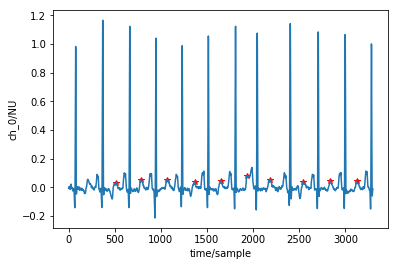

In [33]:
wfdb.plot_items(signal=sig, ann_samp=[t_pos])


In [ ]:
all_height_q = []
all_height_s = []
all_durations_q = []
all_durations_s = []
min_height = []
for patient in mitdb.patient_records:
    q_points, q_properties,  s_points, s_properties = q_s_peak_properties_extractor(patient)
    all_height_q.extend(q_properties["height"])
    all_height_s.extend(s_properties["height"])
    
    all_durations_q.extend(q_properties["durations"])
    all_durations_s.extend(s_properties["durations"])
    for i in range(0, len(q_properties["height"])):
        if(q_properties["height"][i] == 0):
            print(patient.filename, i )
            min_height.append(q_properties["height"][i])    

Patient file:  100 begins


C:\Users\nimch681\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:129: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


100 1905
Patient file:  101 begins
101 906
Patient file:  102 begins
102 89
102 97
102 1314
Patient file:  103 begins
Patient file:  104 begins
104 116
104 121
104 134
104 146
104 215
104 243
104 262
104 296
104 342
104 372
104 383
104 458
104 502
104 572
104 588
104 598
104 606
104 641
104 647
104 669
104 680
104 692
104 703
104 733
104 740
104 766
104 774
104 785
104 793
104 803
104 810
104 818
104 824
104 859
104 876
104 953
104 1073
104 1221
104 1236
104 1296
104 1464
104 1466
104 1532
104 1643
104 1930
104 1935
104 2101
104 2106
Patient file:  105 begins
105 85
105 121
105 475
105 625
105 791
105 901
105 1012
105 1096
105 1156
105 1199
105 1213
105 1257
105 1331
105 1374
105 1383
105 1417
105 1469
105 1492
105 1538
105 1632
105 1643
105 1644
105 1673
105 1678
105 1793
105 1808
105 1825
105 1840
105 1910
105 1917
105 1924
105 1933
105 1975
105 2037
105 2129
105 2146
105 2202
105 2227
105 2317
105 2321
105 2416
105 2456
105 2465
105 2467
105 2485
105 2497
105 2543
105 2553
105 2554


In [ ]:
print(len(time), temp_point, origin_to_new_point(start_point,s_points[count]), s_points[count], count, len(s_points) )
 if((time[temp_point]-time[origin_to_new_point(start_point,s_points[count])])<=time_limit_from_r):

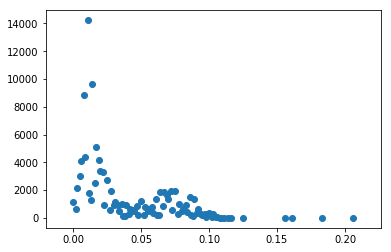

In [66]:
x ,y  = np.unique(all_durations_q, return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)

0.029803008627806587

112543